In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [4]:
!gdown --id  1P6rcX_Ic1NQnalHDDN19TF8OtSoXX_58

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1P6rcX_Ic1NQnalHDDN19TF8OtSoXX_58
From (redirected): https://drive.google.com/uc?id=1P6rcX_Ic1NQnalHDDN19TF8OtSoXX_58&confirm=t&uuid=61f63622-189e-4aff-a94b-3ded1007312d
To: /kaggle/working/Copy of FraudDetectionDataset.csv
100%|███████████████████████████████████████| 1.65G/1.65G [00:05<00:00, 310MB/s]


In [5]:
ls -l ./"Copy of FraudDetectionDataset.csv"

-rw-r--r-- 1 root root 1645852368 Sep 17 21:03 './Copy of FraudDetectionDataset.csv'


In [6]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)


In [7]:
df = pd.read_csv('/kaggle/working/Copy of FraudDetectionDataset.csv')

# Exploratory Data Analysis

In [7]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


## Categorical values
In this section, we explore relationships and patterns in categorical values within our dataset. Categorical data consists of specific categories or labels. We aim to understand how these categories relate to each other, aiding decision-making and deeper data comprehension through visualization and analysis.

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'User Gender'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame



value_counts_df

,User Gender,Target_0,Target_1
0,Prefer Not to Say,428886,428298
1,Genderqueer,428121,428727
2,Male,428893,429405
3,Agender,427683,428468
4,Other,428243,428311
5,Female,429264,427641
6,Non-Binary,429004,429056


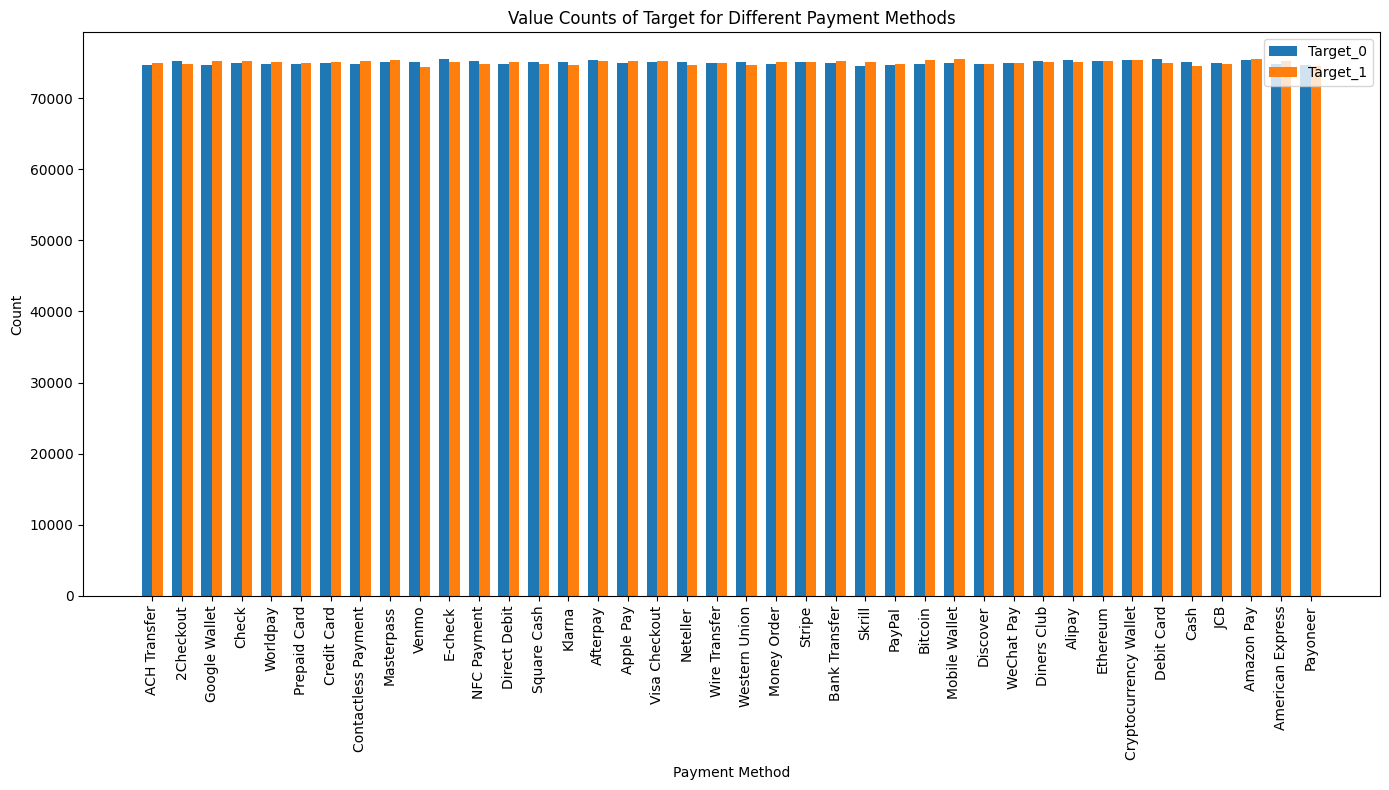

In [52]:
# Plotting
width = 0.35
x = np.arange(len(value_counts_df['Payment Method']))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df['Payment Method'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

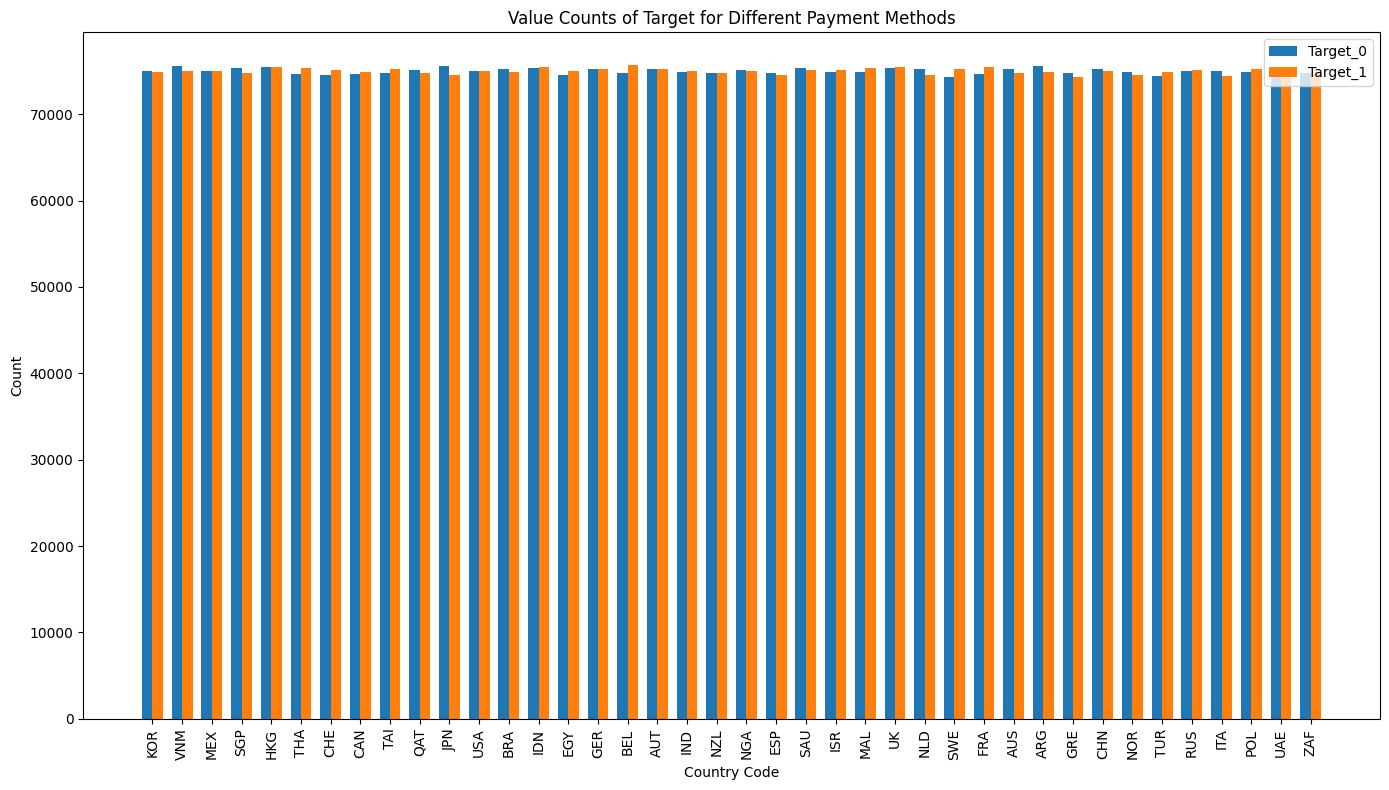

,Country Code,Target_0,Target_1
0,KOR,74951,74854
1,VNM,75540,75005
2,MEX,75048,75065
3,SGP,75388,74739
4,HKG,75442,75475
5,THA,74624,75341
6,CHE,74565,75145
7,CAN,74621,74885
8,TAI,74809,75271
9,QAT,75068,74770


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Country Code'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

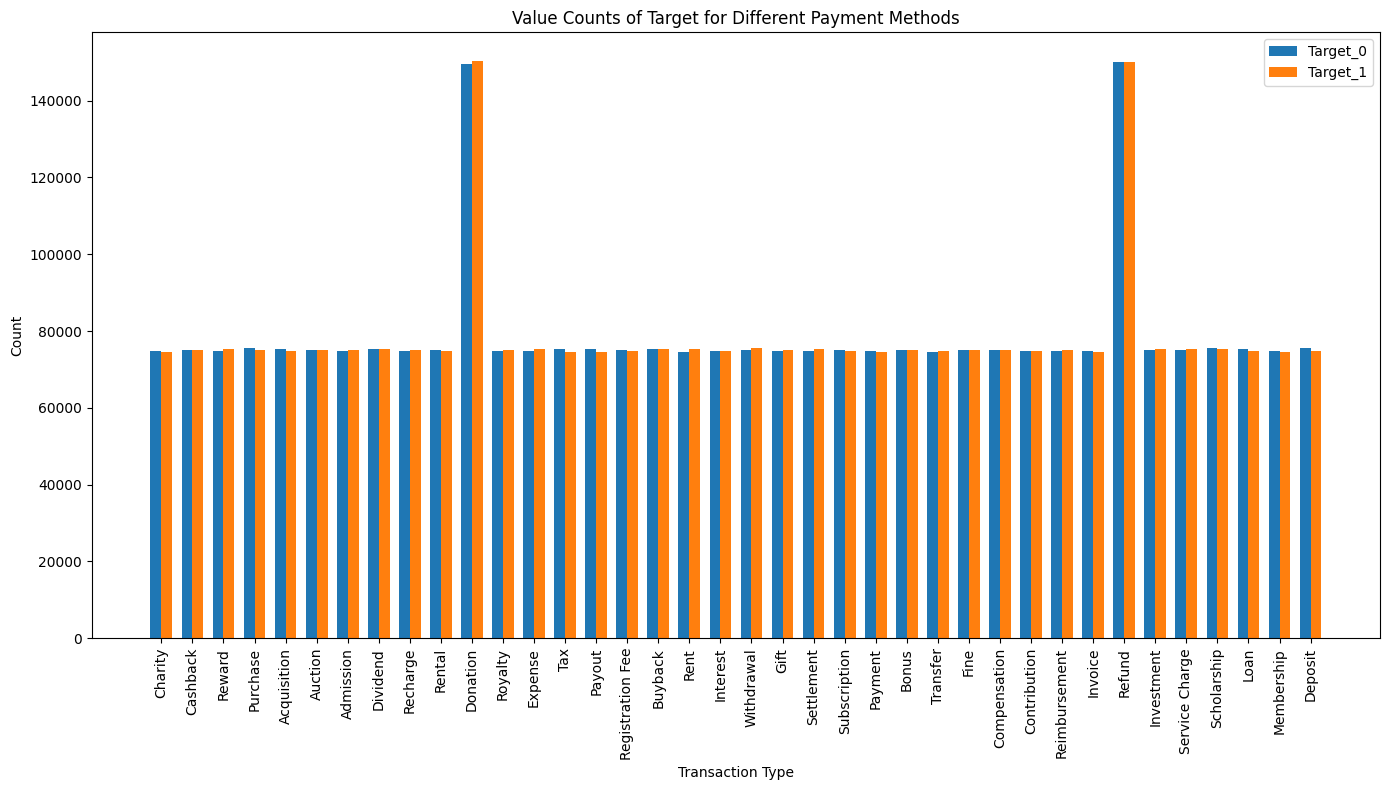

,Transaction Type,Target_0,Target_1
0,Charity,74911,74462
1,Cashback,75177,75060
2,Reward,74689,75402
3,Purchase,75609,75182
4,Acquisition,75435,74922
5,Auction,75165,74940
6,Admission,74689,74939
7,Dividend,75230,75319
8,Recharge,74829,75067
9,Rental,75077,74921


In [60]:

import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Transaction Type'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

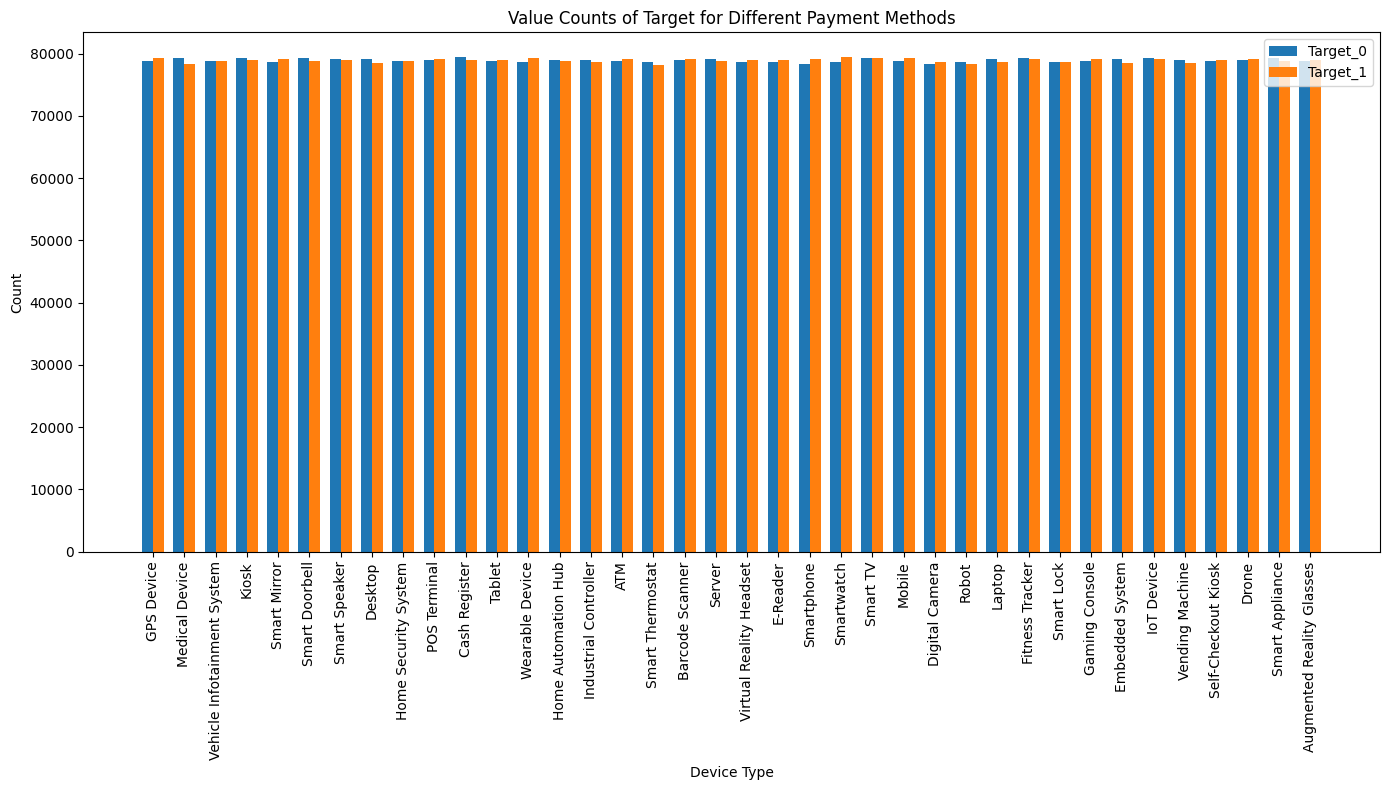

,Device Type,Target_0,Target_1
0,GPS Device,78891,79262
1,Medical Device,79339,78385
2,Vehicle Infotainment System,78900,78853
3,Kiosk,79245,78989
4,Smart Mirror,78610,79082
5,Smart Doorbell,79247,78808
6,Smart Speaker,79188,79019
7,Desktop,79084,78523
8,Home Security System,78883,78858
9,POS Terminal,79023,79147


In [61]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Device Type'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

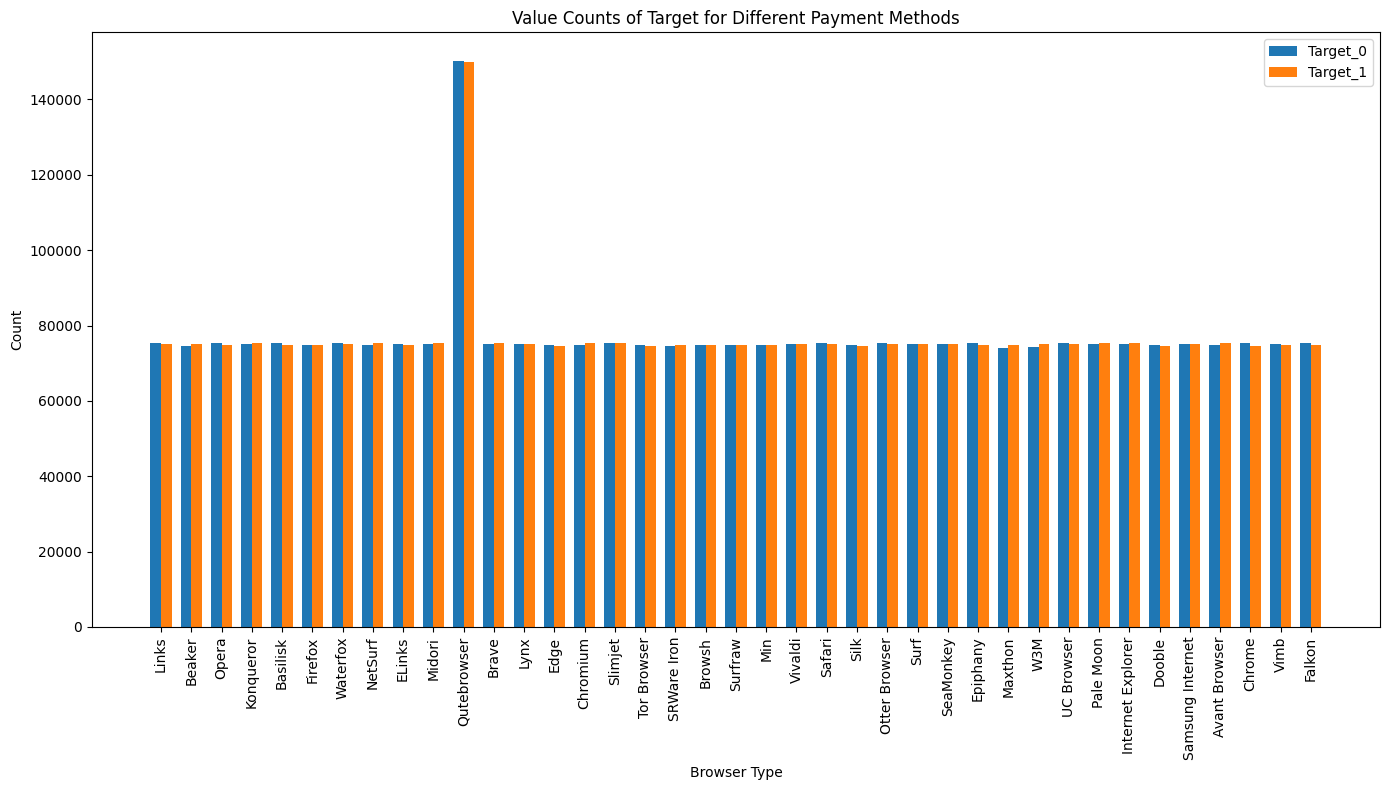

,Browser Type,Target_0,Target_1
0,Links,75294,75121
1,Beaker,74622,75027
2,Opera,75248,74901
3,Konqueror,75127,75340
4,Basilisk,75264,74839
5,Firefox,74759,74804
6,Waterfox,75254,75086
7,NetSurf,74833,75372
8,ELinks,74970,74791
9,Midori,75107,75373


In [62]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Browser Type'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

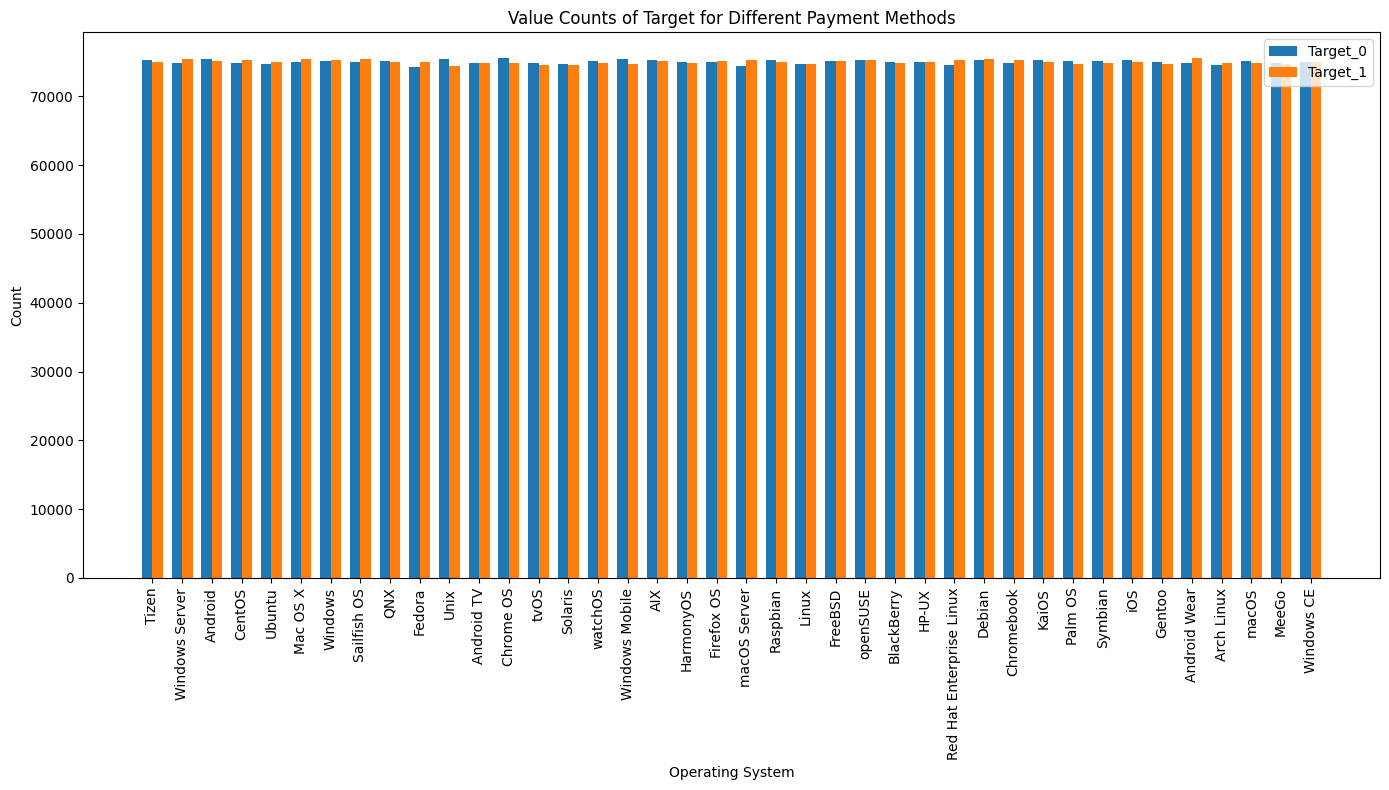

,Operating System,Target_0,Target_1
0,Tizen,75218,74981
1,Windows Server,74852,75386
2,Android,75385,75077
3,CentOS,74844,75284
4,Ubuntu,74753,75007
5,Mac OS X,74953,75427
6,Windows,75133,75284
7,Sailfish OS,74968,75492
8,QNX,75067,74958
9,Fedora,74250,75024


In [63]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Operating System'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

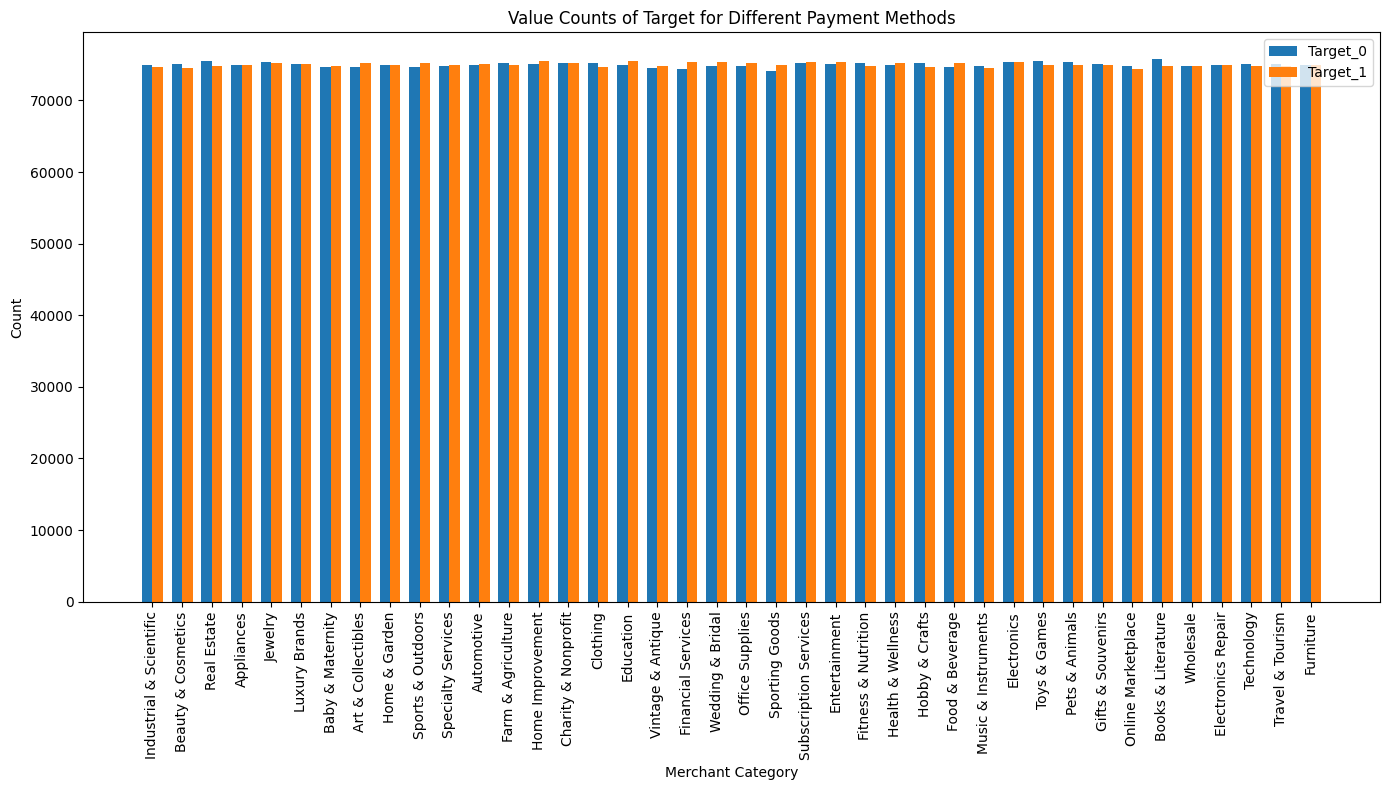

,Merchant Category,Target_0,Target_1
0,Industrial & Scientific,74917,74712
1,Beauty & Cosmetics,75101,74526
2,Real Estate,75524,74850
3,Appliances,74975,74903
4,Jewelry,75391,75194
5,Luxury Brands,75128,75048
6,Baby & Maternity,74701,74807
7,Art & Collectibles,74620,75280
8,Home & Garden,74883,74994
9,Sports & Outdoors,74595,75265


In [64]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Merchant Category'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

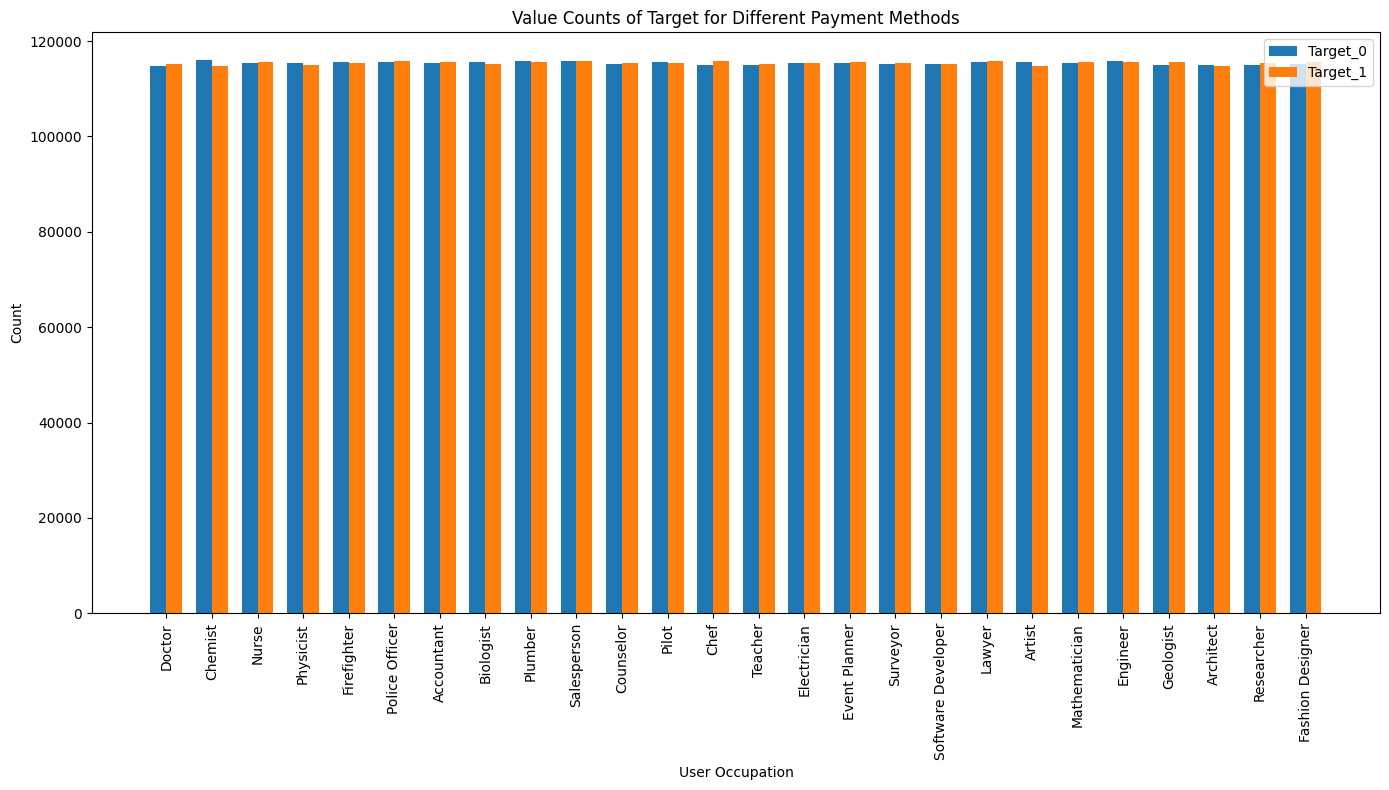

,User Occupation,Target_0,Target_1
0,Doctor,114854,115263
1,Chemist,116023,114688
2,Nurse,115329,115662
3,Physicist,115393,114905
4,Firefighter,115592,115297
5,Police Officer,115521,115823
6,Accountant,115493,115537
7,Biologist,115537,115259
8,Plumber,115729,115611
9,Salesperson,115739,115772


In [65]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'User Occupation'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

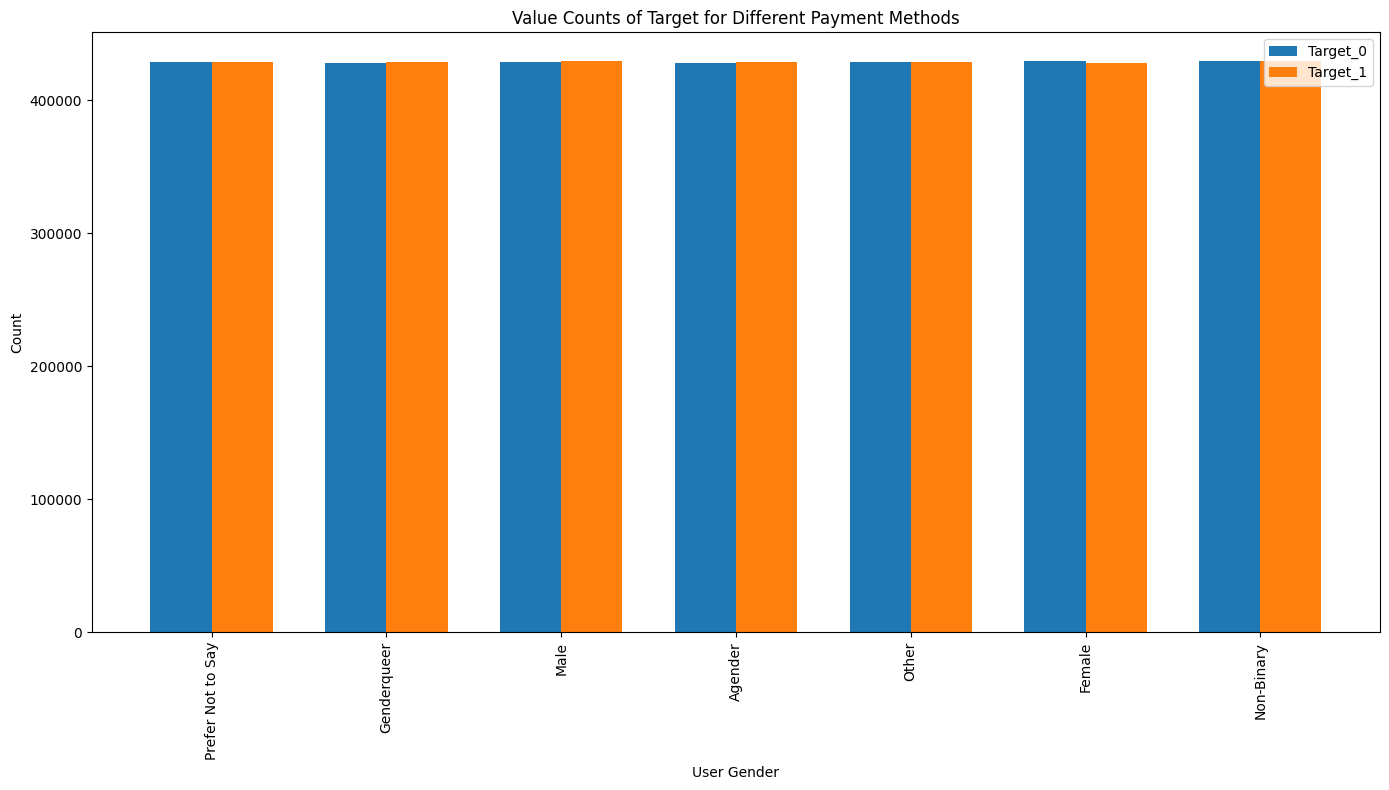

,User Gender,Target_0,Target_1
0,Prefer Not to Say,428886,428298
1,Genderqueer,428121,428727
2,Male,428893,429405
3,Agender,427683,428468
4,Other,428243,428311
5,Female,429264,427641
6,Non-Binary,429004,429056


In [66]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'User Gender'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

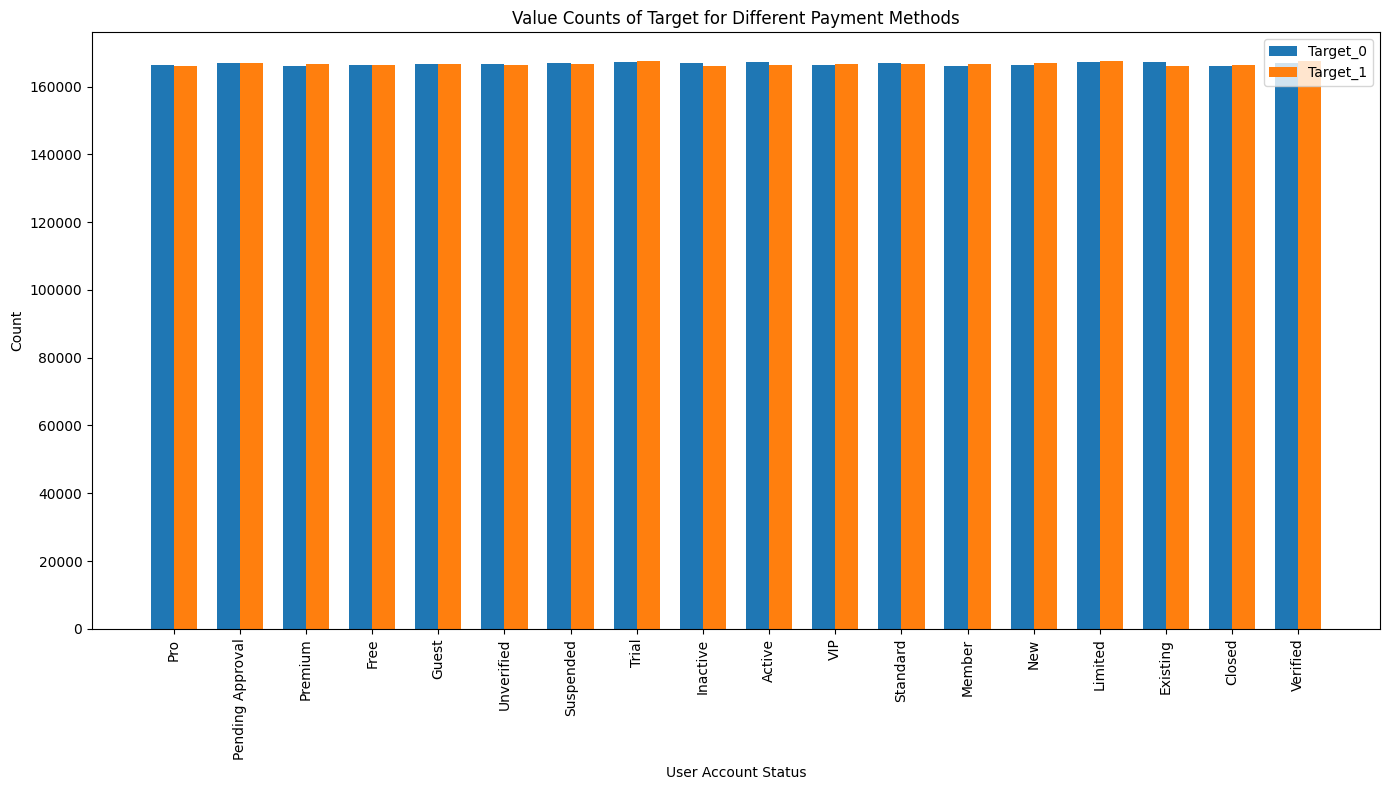

,User Account Status,Target_0,Target_1
0,Pro,166271,166020
1,Pending Approval,166989,166843
2,Premium,166146,166688
3,Free,166439,166291
4,Guest,166697,166586
5,Unverified,166597,166450
6,Suspended,166807,166514
7,Trial,167378,167582
8,Inactive,166899,165949
9,Active,167114,166471


In [67]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'User Account Status'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

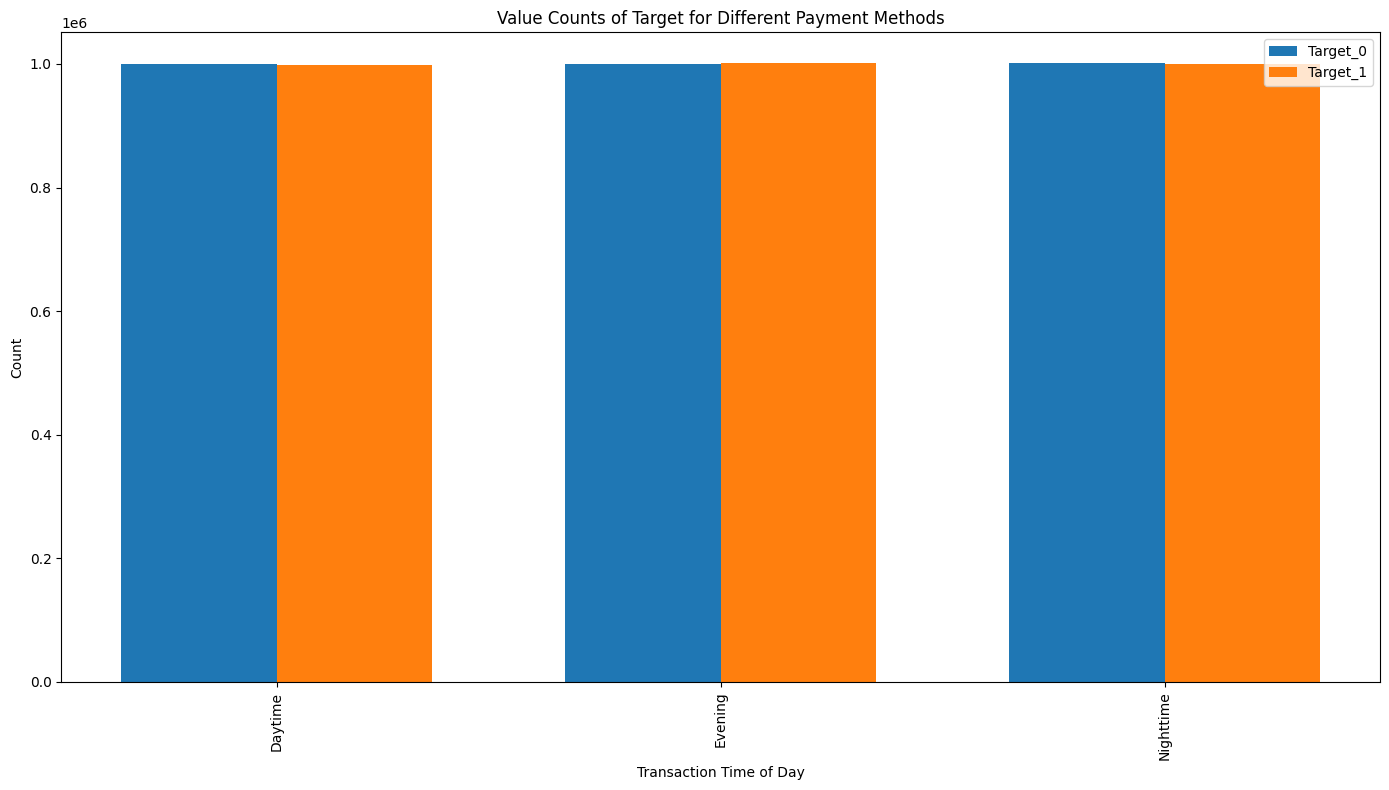

,Transaction Time of Day,Target_0,Target_1
0,Daytime,999496,999099
1,Evening,999482,1000743
2,Nighttime,1001116,1000064


In [68]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = 'Transaction Time of Day'
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

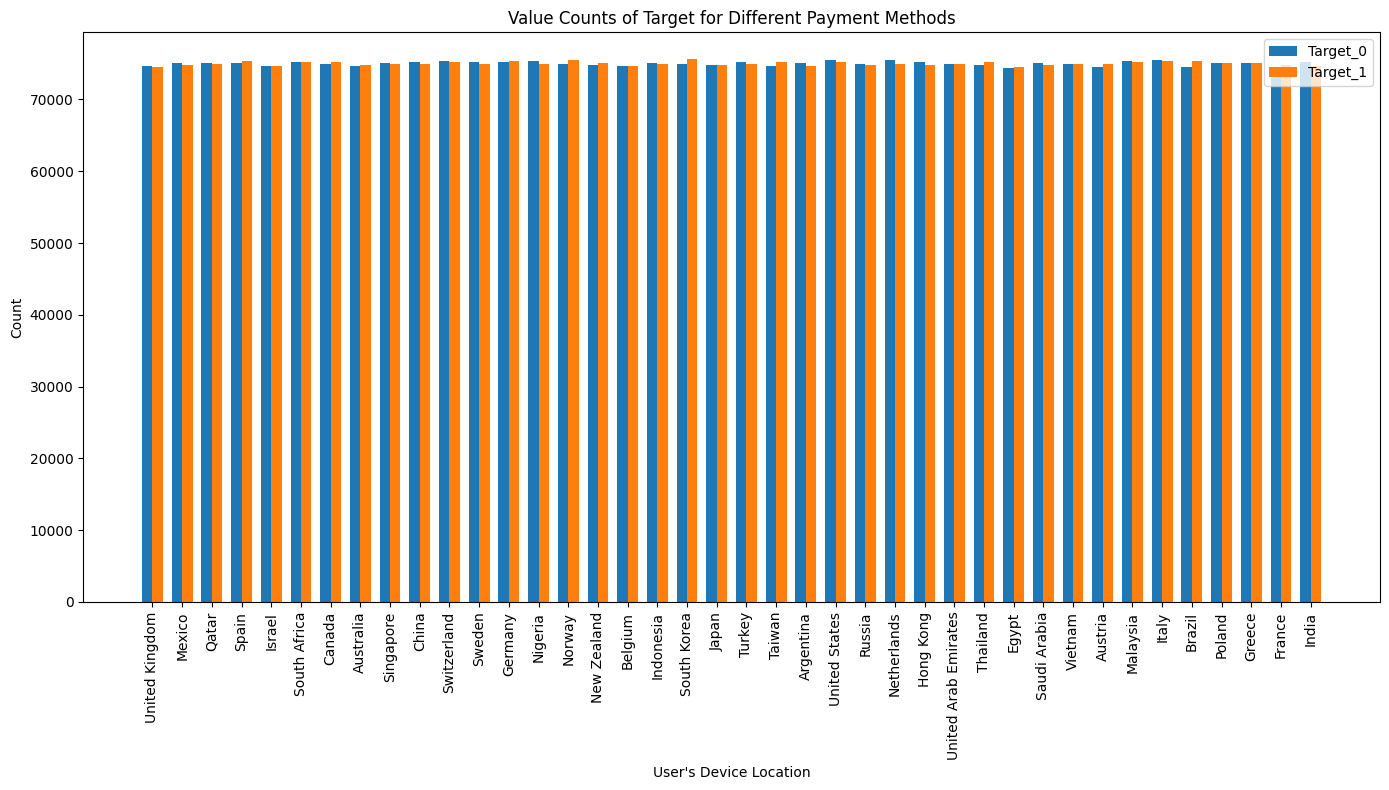

,User's Device Location,Target_0,Target_1
0,United Kingdom,74685,74567
1,Mexico,75123,74845
2,Qatar,75046,74939
3,Spain,75091,75315
4,Israel,74639,74607
5,South Africa,75261,75235
6,Canada,74973,75192
7,Australia,74630,74762
8,Singapore,75113,74896
9,China,75178,74922


In [70]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = "User's Device Location"
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

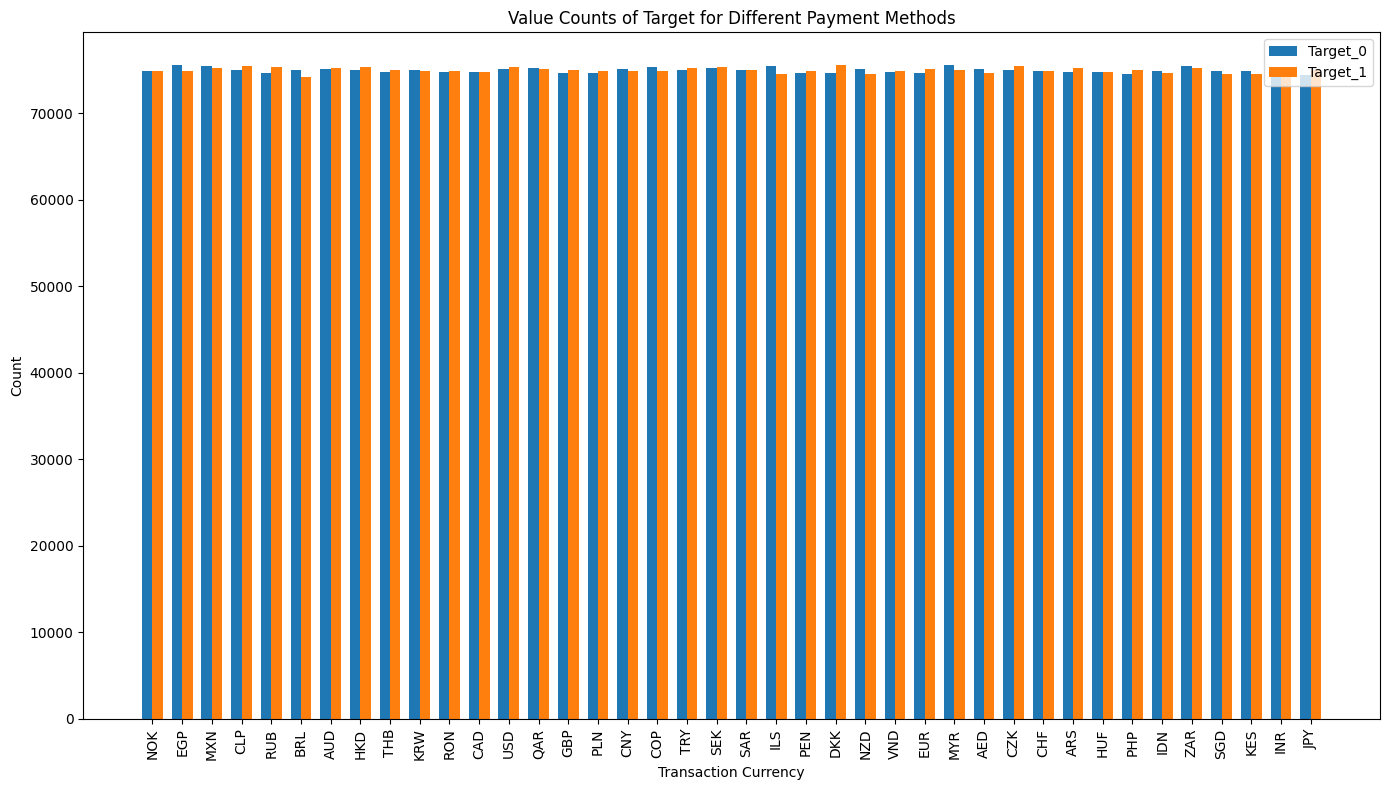

,Transaction Currency,Target_0,Target_1
0,NOK,74877,74869
1,EGP,75592,74933
2,MXN,75480,75230
3,CLP,75057,75517
4,RUB,74691,75321
5,BRL,75078,74245
6,AUD,75132,75221
7,HKD,75059,75372
8,THB,74847,74976
9,KRW,75062,74905


In [71]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = "Transaction Currency"
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

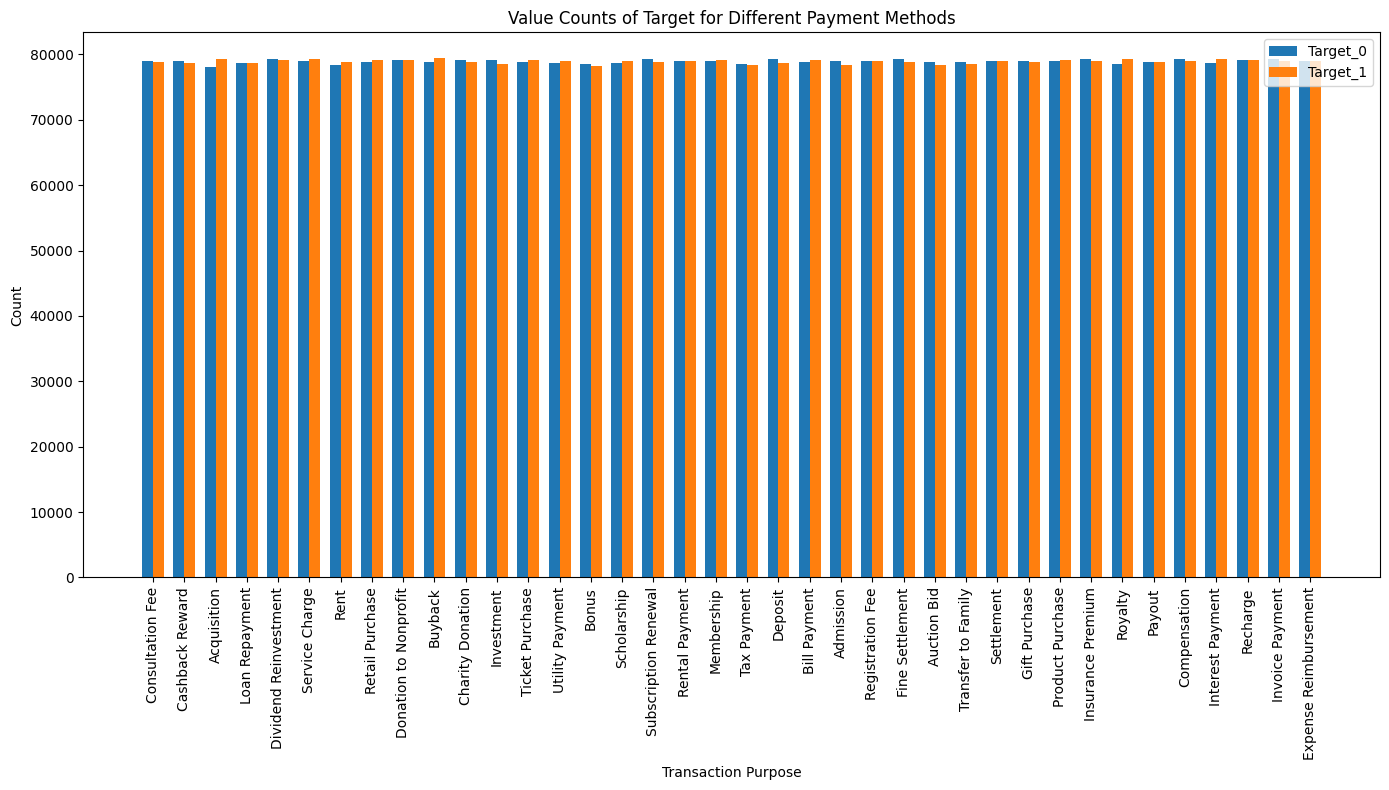

,Transaction Purpose,Target_0,Target_1
0,Consultation Fee,79064,78858
1,Cashback Reward,78980,78729
2,Acquisition,78157,79367
3,Loan Repayment,78712,78664
4,Dividend Reinvestment,79279,79108
5,Service Charge,79023,79274
6,Rent,78449,78886
7,Retail Purchase,78876,79096
8,Donation to Nonprofit,79234,79153
9,Buyback,78869,79419


In [72]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = "Transaction Purpose"
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

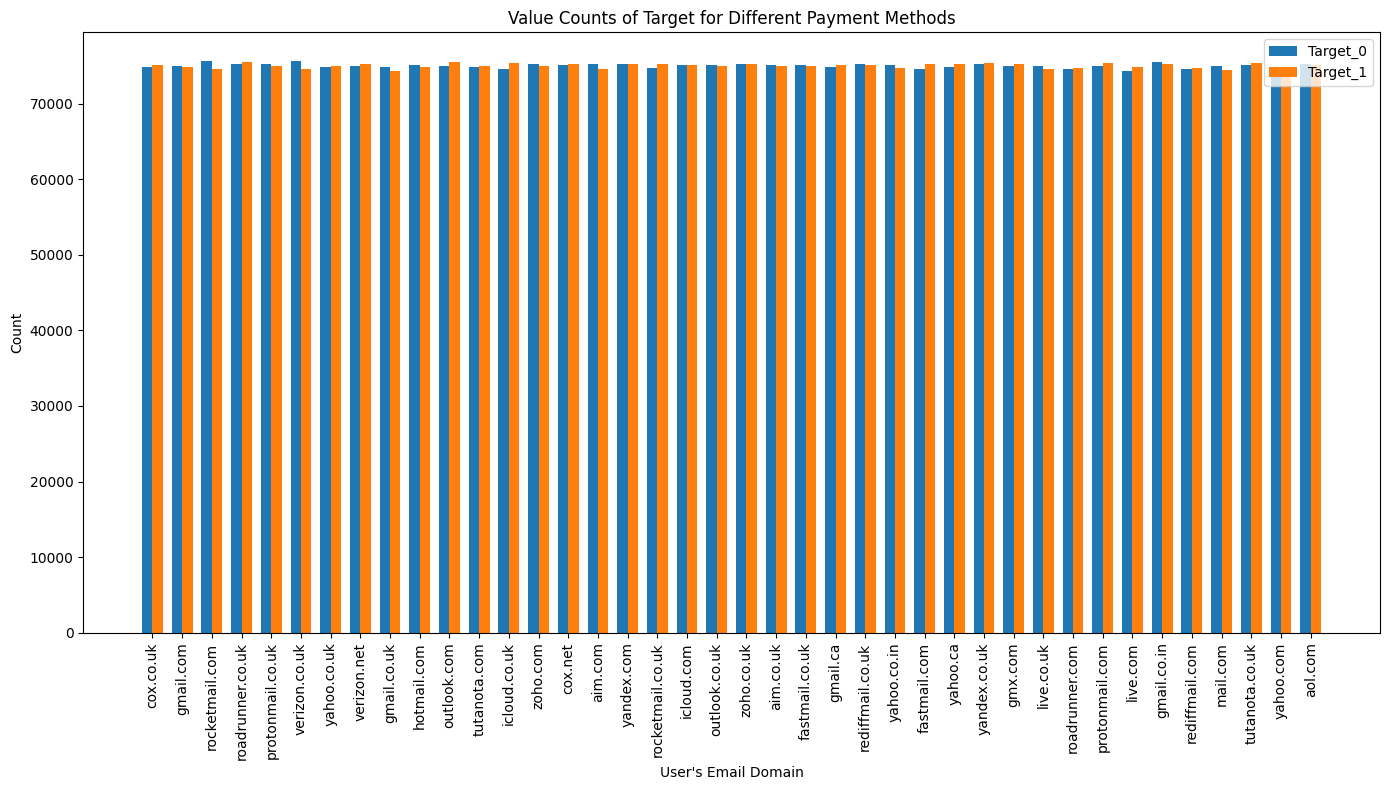

,User's Email Domain,Target_0,Target_1
0,cox.co.uk,74877,75139
1,gmail.com,74966,74872
2,rocketmail.com,75637,74582
3,roadrunner.co.uk,75242,75534
4,protonmail.co.uk,75225,74951
5,verizon.co.uk,75563,74553
6,yahoo.co.uk,74881,74933
7,verizon.net,74973,75285
8,gmail.co.uk,74818,74247
9,hotmail.com,75043,74780


In [73]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = "User's Email Domain"
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

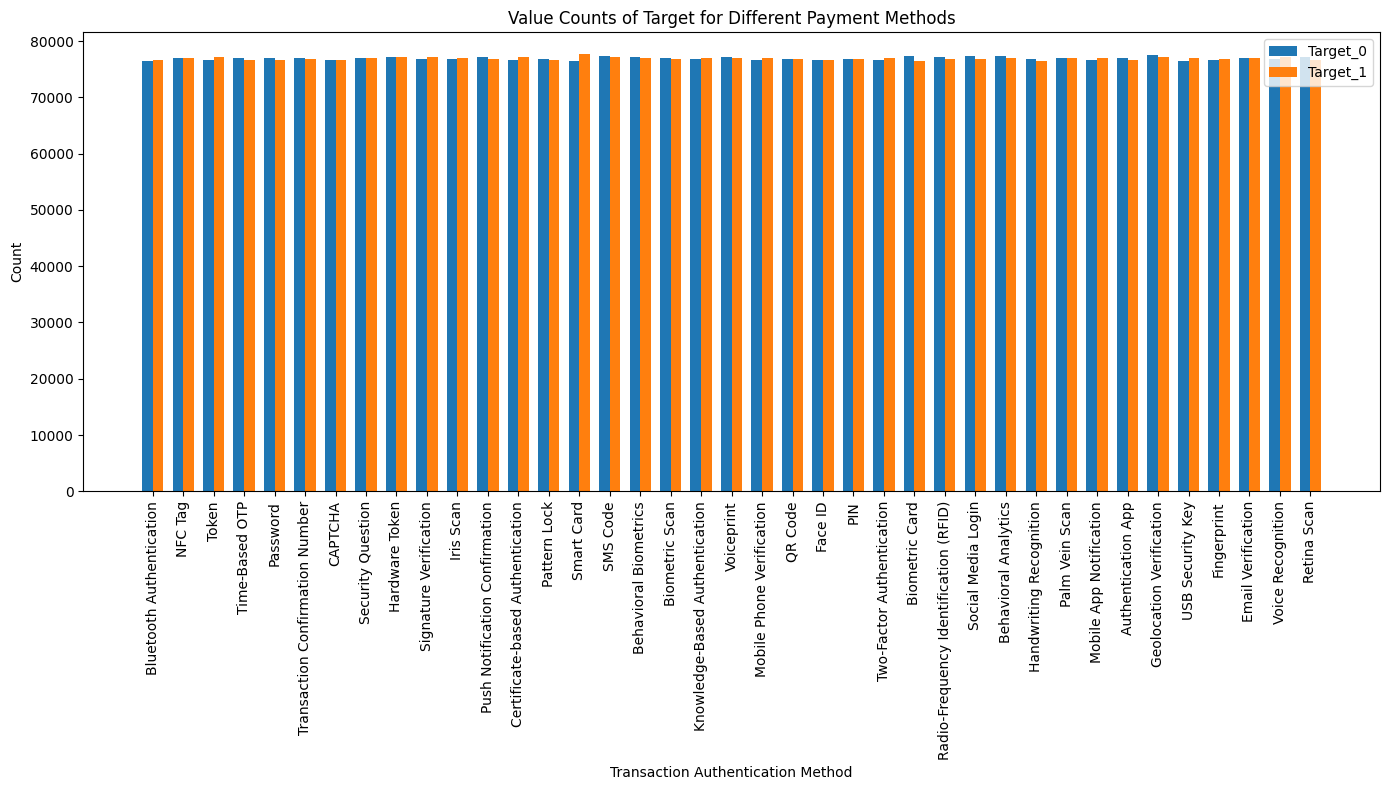

,Transaction Authentication Method,Target_0,Target_1
0,Bluetooth Authentication,76547,76553
1,NFC Tag,76986,77003
2,Token,76640,77196
3,Time-Based OTP,76971,76664
4,Password,76919,76707
5,Transaction Confirmation Number,77004,76838
6,CAPTCHA,76690,76599
7,Security Question,77012,76993
8,Hardware Token,77100,77150
9,Signature Verification,76864,77217


In [74]:


import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name



# Replace 'Categorical Feature' and 'Target' with your actual column names
cat_feature = "Transaction Authentication Method"
target = 'Fraudulent Flag'


# Create an empty list to store DataFrames
dfs = []

# Iterate through each category in the categorical feature and plot value counts for the target
categories = df[cat_feature].unique()

for category in categories:
    # Calculate value counts
    value_counts = df[df[cat_feature] == category][target].value_counts().reset_index()
    value_counts.columns = ['Target', 'Count']
    
    # Create a DataFrame for each category
    category_df = pd.DataFrame({
        cat_feature: [category],
        'Target_0': [value_counts[value_counts['Target'] == 0]['Count'].values[0]],
        'Target_1': [value_counts[value_counts['Target'] == 1]['Count'].values[0]]
    })
    
    dfs.append(category_df)

# Concatenate all DataFrames into one
value_counts_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame

# Plotting
width = 0.35
x = np.arange(len(value_counts_df[cat_feature]))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, value_counts_df['Target_0'], width, label='Target_0')
bar2 = ax.bar(x + width/2, value_counts_df['Target_1'], width, label='Target_1')

ax.set_xlabel(cat_feature)
ax.set_ylabel('Count')
ax.set_title('Value Counts of Target for Different Payment Methods')
ax.set_xticks(x)
ax.set_xticklabels(value_counts_df[cat_feature], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


value_counts_df

## Data Analysis Report; Categorical Features

The dataset exhibited an even distribution of classes, demonstrating a balanced representation among all categories, including the target class. This balanced distribution is beneficial for building a predictive model without any significant bias towards a particular class.

- **Transaction Purpose Analysis:**

    - Transactions categorized as 'Donation' and 'Refund' displayed a notably higher volume, approximately twice the average count compared to other transaction types. This suggests that these transaction purposes are significantly more prevalent in the dataset, potentially indicating unique patterns or characteristics associated with them.
- **Browser Type Analysis:**

    - Within the 'Browser Type' feature, 'Qutebrowser' stood out with a volume approximately two times higher than the average volume across other browser types. This observation highlights a potential anomaly or distinct behavior associated with this browser type.
- **Recommendations:**

    - For the observed special cases where transaction purposes such as 'Donation' and 'Refund' and browser type 'Qutebrowser' exhibit significantly higher volumes, it is recommended to engineer specific features to capture these anomalies as indicators. Creating dedicated features that flag these unique patterns can enhance the model's ability to identify and respond to atypical transactions associated with these cases. Incorporating such features in the model can lead to improved fraud detection performance by accounting for these distinctive transaction characteristics.
    - By identifying and addressing these specific cases with abnormal volumes, the model can be enhanced to capture and analyze patterns related to these cases effectively. This approach can ultimately contribute to a more robust and accurate fraud detection system.

### Observations on Data Authenticity:

- **Gender Class Imbalance:**
  - An intriguing observation is the even distribution of gender classes, including 'Male,' 'Female,' 'Queer,' and others, which is highly unusual in real-world scenarios. A critical question arises: How does the 'Other' class of gender have the same frequency as 'Male' and 'Female'? This uniform distribution raises concerns about the authenticity of the gender-related data, suggesting it might be synthetically generated or inaccurately represented.

- **Device Type Transactions:**
  - The equal transaction frequency among vastly different device types, such as 'Smart Doorbell,' 'Bar Code Scanner,' 'Fitness Tracker,' 'Laptop,' and 'Desktop,' is another anomaly. It's improbable for these diverse devices to have the same involvement in transactions, especially considering their distinct functionalities and typical use cases. This inconsistency further questions the authenticity of the data and suggests potential data generation or representation issues. The question that arises is: How do devices like 'Smart Doorbell,' 'Bar Code Scanner,' and 'Fitness Tracker' make transactions, let alone have the same transaction frequency as 'Laptop' and 'Desktop'?

- **Data Authenticity Concerns:**
  - The patterns observed in gender, device type and other distributions strongly indicate the possibility of synthetic data generation. Real-world data is expected to demonstrate inherent variations and imbalances reflective of actual user behaviors and device usage. The discrepancies observed in this dataset raise doubts about its authenticity and applicability to real-world scenarios. This leads to a critical question: Does the data truly reflect genuine, real-world transactions and behaviors, or is it synthetically generated?

- **Recommendations for Data Validation:**
  - To ensure the dataset's accuracy and suitability for analysis, a comprehensive validation process should be conducted. This can involve cross-referencing the data with trusted sources, confirming its origins, and verifying its consistency with established norms and patterns in similar domains. Any anomalies or inconsistencies should be thoroughly investigated and addressed to enhance the dataset's reliability and trustworthiness. The key question is: How can we validate the authenticity of the dataset to ensure its credibility and reliability for meaningful analysis and modeling?

## Numerical Values
In this section, we delve into the analysis and patterns present in numerical values within our dataset. Numerical data comprises quantifiable, numerical information. Our objective is to comprehend the interrelations and insights derived from these numerical values. Visualization and analytical techniques will be employed to facilitate decision-making and a thorough understanding of the data.

In [76]:
num_columns = ['User Income', 'Location Distance', 'Time Taken for Transaction',
               "User's Transaction History", "Merchant's Reputation Score",
               "User's Credit Score", "Merchant's Business Age", 'Fraudulent Flag']


In [78]:
df_num = df[num_columns]

In [79]:
df_num.describe()

,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


The dataset provides numerical insights across various features. The 'User Income' ranges from 1,000 to 100,000, with an average of approximately 50,493. 'Location Distance' and 'Time Taken for Transaction' exhibit mean values of approximately 50.51 and 30.49, respectively. 'User's Transaction History' and 'Merchant's Reputation Score' hover around 50.48 and 2.99 on average, respectively. 'User's Credit Score' shows an average of 574.95, while 'Merchant's Business Age' has an average of approximately 10.50. Finally, 'Fraudulent Flag' is binary with a near-even split, indicating a balanced distribution between fraudulent and non-fraudulent transactions. These numerical summaries provide a glimpse into the dataset's key statistical attributes.

In [80]:
df_num.corr()

,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
User Income,1.000000,0.000595,0.000124,0.000118,0.000046,-0.000294,0.001005,0.000543
Location Distance,0.000595,1.000000,-0.000109,0.000434,-0.000512,0.000256,0.000734,0.000277
Time Taken for Transaction,0.000124,-0.000109,1.000000,-0.000276,0.000163,0.000005,0.000096,-0.000262
User's Transaction History,0.000118,0.000434,-0.000276,1.000000,-0.000491,-0.000156,0.000487,0.000755
Merchant's Reputation Score,0.000046,-0.000512,0.000163,-0.000491,1.000000,-0.000444,0.000399,0.000322
User's Credit Score,-0.000294,0.000256,0.000005,-0.000156,-0.000444,1.000000,0.000866,-0.000216
Merchant's Business Age,0.001005,0.000734,0.000096,0.000487,0.000399,0.000866,1.000000,0.000168
Fraudulent Flag,0.000543,0.000277,-0.000262,0.000755,0.000322,-0.000216,0.000168,1.000000


The correlation matrix showcases the relationships between different numerical features. Most correlations are close to zero, indicating a weak linear relationship. For instance, 'User Income' and 'Location Distance' show an extremely low correlation of 0.000595. Similarly, other pairs also exhibit negligible correlations. In the context of modeling, these low or near-zero correlations imply that these features have limited predictive power in a linear model. Therefore, relying solely on these features might not significantly impact the model's performance. It's essential to consider other features or potentially engineer new ones to enhance the predictive capability of the model.

The correlation matrix and other factors highlight a pattern of randomness within the data. The low correlations and high entropy across many features suggest that the dataset lacks strong linear relationships or discernible patterns. In machine learning models, randomness and low correlation can pose challenges in deriving meaningful insights and accurate predictions. The high entropy implies a high level of disorder or unpredictability within the dataset. Addressing this may require more sophisticated modeling techniques or feature engineering to extract valuable information and improve the model's predictive performance.


## Time Series Analysis

In [9]:
time_df = df[['Transaction Date and Time', 'Fraudulent Flag']]
time_df

,Transaction Date and Time,Fraudulent Flag
0,2023-01-02 07:47:54,0
1,2021-09-12 15:15:41,1
2,2023-01-12 17:25:58,1
3,2021-02-27 11:31:00,1
4,2022-09-24 04:06:38,1
...,...,...
5999995,2021-10-20 15:56:32,0
5999996,2021-06-14 02:10:00,1
5999997,2021-11-06 22:33:19,0
5999998,2022-03-13 15:02:35,0


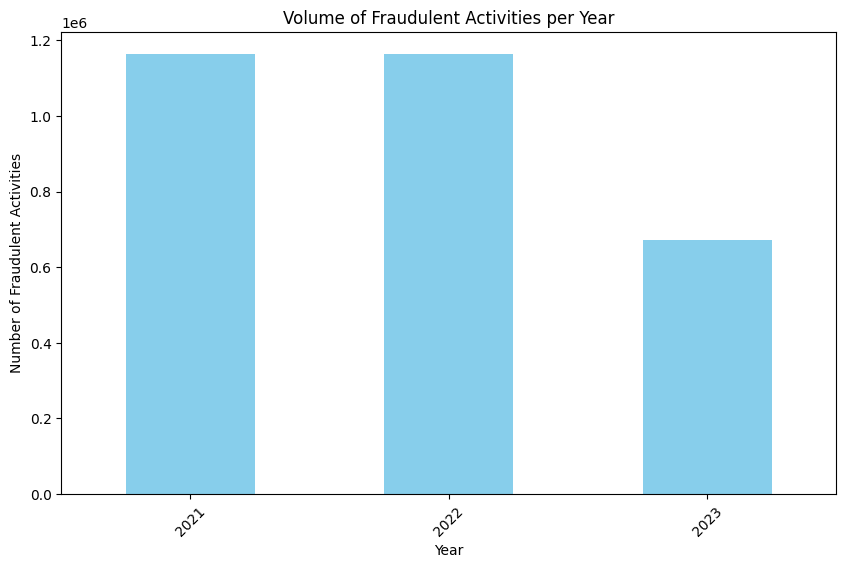

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the given data
# Replace df with your actual DataFrame name

# Convert 'Transaction Date and Time' to datetime
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Extract year from the 'Transaction Date and Time' column
df['Year'] = df['Transaction Date and Time'].dt.year

# Group by year and count the number of fraudulent activities
fraud_per_year = df[df['Fraudulent Flag'] == 1].groupby('Year').size()

# Plot the volume of fraudulent activities per year
plt.figure(figsize=(10, 6))
fraud_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Activities')
plt.title('Volume of Fraudulent Activities per Year')
plt.xticks(rotation=45)
plt.show()


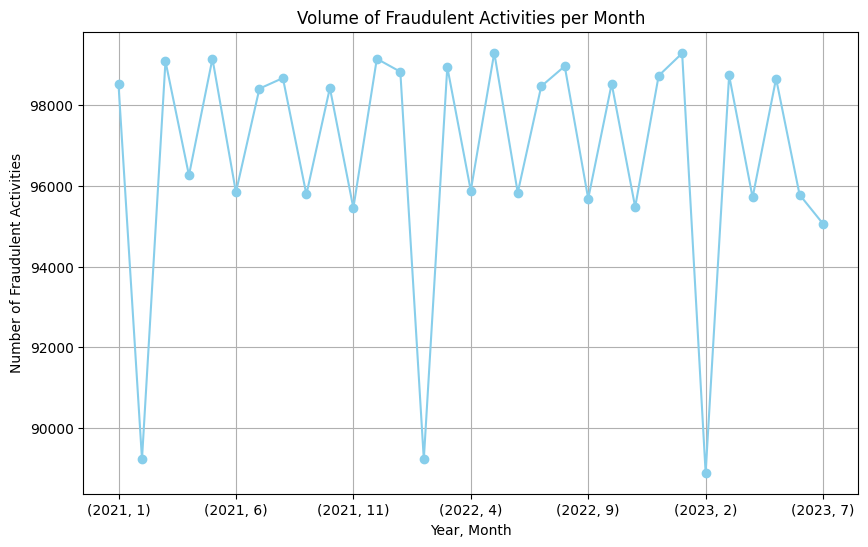

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the given data
# Replace df with your actual DataFrame name

# Convert 'Transaction Date and Time' to datetime
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Extract year and month from the 'Transaction Date and Time' column
df['Year'] = df['Transaction Date and Time'].dt.year
df['Month'] = df['Transaction Date and Time'].dt.month

# Group by year and month, and count the number of fraudulent activities
fraud_per_month = df[df['Fraudulent Flag'] == 1].groupby(['Year','Month']).size()

# Plot the volume of fraudulent activities per month using a line chart
plt.figure(figsize=(10, 6))
fraud_per_month.plot(marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year, Month')
plt.ylabel('Number of Fraudulent Activities')
plt.title('Volume of Fraudulent Activities per Month')
plt.grid(True)
plt.show()


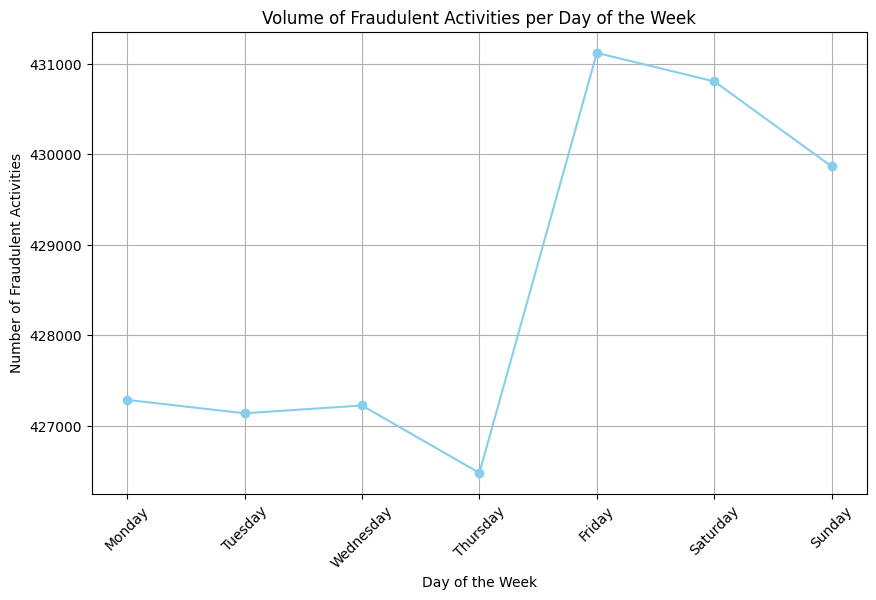

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the given data
# Replace df with your actual DataFrame name

# Convert 'Transaction Date and Time' to datetime
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Extract day of the week (0: Monday, 6: Sunday) from the 'Transaction Date and Time' column
df['Day of Week'] = df['Transaction Date and Time'].dt.dayofweek

# Group by day of the week, and count the number of fraudulent activities
fraud_per_dayofweek = df[df['Fraudulent Flag'] == 1].groupby('Day of Week').size()

# Plot the volume of fraudulent activities per day of the week using a line chart
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
fraud_per_dayofweek.plot(marker='o', color='skyblue', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Activities')
plt.title('Volume of Fraudulent Activities per Day of the Week')
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid(True)
plt.show()


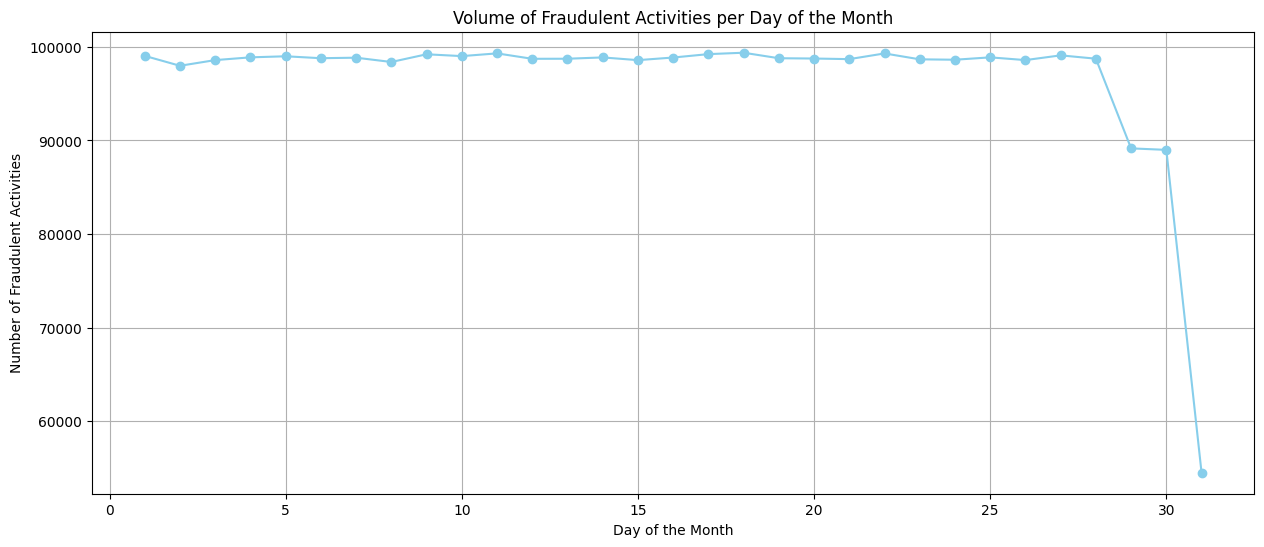

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the given data
# Replace df with your actual DataFrame name

# Convert 'Transaction Date and Time' to datetime
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Extract day of the month from the 'Transaction Date and Time' column
df['Day of Month'] = df['Transaction Date and Time'].dt.day

# Group by day of the month, and count the number of fraudulent activities
fraud_per_dayofmonth = df[df['Fraudulent Flag'] == 1].groupby('Day of Month').size()

# Plot the volume of fraudulent activities per day of the month using a line chart
plt.figure(figsize=(15, 6))
fraud_per_dayofmonth.plot(marker='o', color='skyblue', linestyle='-')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Fraudulent Activities')
plt.title('Volume of Fraudulent Activities per Day of the Month')
plt.grid(True)
plt.show()


Analyzing the volume of fraudulent activities over time, as represented by the time series data of the transactions, provides valuable insights. From the plotted time series data, patterns and trends related to fraudulent activities can be observed, particularly in relation to different time intervals such as years, months, days of the week, and days of the month. These patterns suggest that time can be a significant factor in understanding and predicting fraudulent behavior. In light of these insights, it is imperative to consider feature engineering techniques to extract relevant features from the timestamp data. By crafting features that capture temporal patterns, trends, and periodicities, the machine learning model can be equipped with valuable information to enhance its predictive capabilities in detecting fraudulent transactions.